## PRACTICA 2: GENERACIÓN, GRAFICACIÓN, MANIPULACION Y CÁLCULOS DE SEÑALES CONTINUAS Y DISCRETAS

### OBJETIVOS
1. Crear señales continuas y discretas en el tiempo usando Python y sus librerías.
2. Generar señales exponenciales, sinusoidales, cuadrada, diente de sierra, escalón, chirp, sinc y signo, y visualizarlas en forma continua y discreta.
3. Revisar las diferentes modalidades que existen para graficar una señal.
4. Manipular una determinada señal como, por ejemplo, “voltearla” o rebatirla y/o  desplazarla en tiempo.
5. Realizar cálculos de energía y potencia de esas señales.

## PARTE EXPERIMENTAL
En Spyder cree un nuevo archivo llamado `Practica_2_SyS.py`.  
Vaya creando sectores o celdas con las instrucciones que se irán colocando en este enunciado. Usando `#%%` separa las celdas o grupos. Ejecútelas para verificar su funcionamiento.

Lo primero será importar los siguientes paquetes o librerías: numpy, matplotlib (pyplot) y scipy (signal)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

### SEÑALES CONTINUAS 

Antes de obtener una señal continua en el tiempo, primero debe crear un vector que represente la  secuencia  temporal, teniendo el cuidado de elegir un espaciamiento entre muestras apropiado. Por  ejemplo  para  generar  señales en el intervalo de tiempo $-1<=t,=1$ con muestras tomadas cada $0.05 s$, escriba en la línea de comandos:

In [2]:
T = 0.001

Este valor define la separación temporal (en segundos) entre las muestras. Construya la secuencia temporal que va desde $-1$ a $1$, en pasos $T$:

In [3]:
t = np.arange(-1,1+T,T)  # Vector de tiempo  entre -1 y 1 en pasos de T

Observe que para representar el rango entre $-1$ y $1$ colocamos $1+T$ como fin del intervalo. Esto se hace para que efectivamente nuestro vector termine su intervalo en $1$. Si se colocase `t = np.arange(-1, 1, T)`, el vector terminarìa en `1-T`.

Ahora se debe generar  la función real decreciente $x(t)=e^{-t}$, escriba:

In [4]:
x = np.exp(-t)    # función de NumPy

Grafique $x(t)$ vs. $t$:

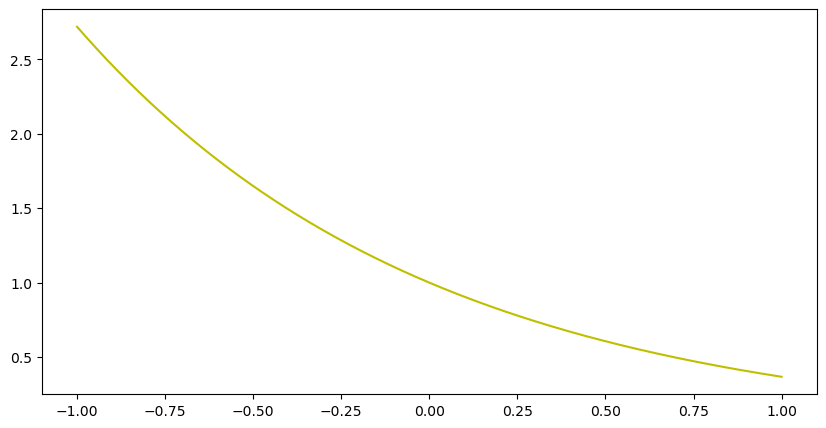

In [5]:
plt.figure(figsize=(10,5))
plt.plot(t,x,"-y")   # módulo pyplot de matplotlib
plt.show()

El símbolo `--y` indica las características del trazo: `-` es el tipo de trazo e `y` es el color (en este caso yellow o amarillo). Puede obtener más información de cualquier comando utilizando `help` en la consola o terminal; por ejemplo, si quiere saber más detalles del comando plot escriba en la consola: `help(plt.plot)` o `?plt.plot`.
Pruebe con diferentes combinaciones de trazos y colores.
Genere la exponencial creciente $w(t)=e^t$ :

In [6]:
w = np.exp(t)

Cree una nueva figura, y grafique $w(t)$ con grilla

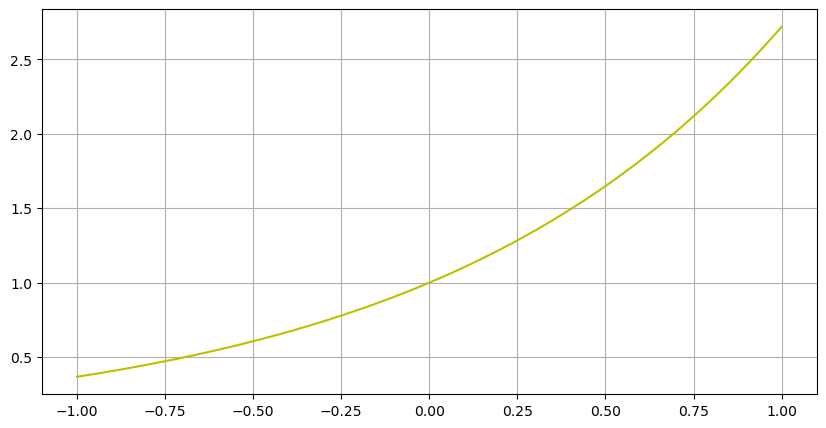

In [7]:
plt.figure(figsize=(10,5))
plt.plot(t,w,'-y')
plt.grid()
plt.show()

Cada vez que desee graficar una nueva figura, debe usar la instrucción `figure` o `figure(k)` donde k es el número que será asignado a la figura. Con poner solo figure el sistema va aumentando secuencialmente la numeración de las figuras.
Calcule y grafique las siguientes funciones con cambios lineales en la escala temporal: $x_1(t)=e^{-2t}$ y
$x_2(t)=e^{-t/2}$
Dibújelas juntas.

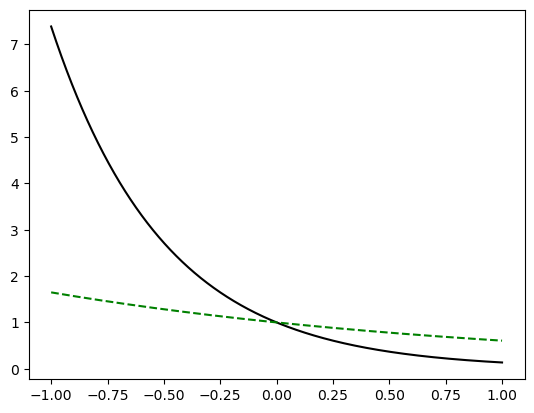

In [8]:
plt.figure(3)
x1=np.exp(-2*t)
x2=np.exp(-t/2)
plt.plot(t, x1, '-k', t, x2, '--g')
plt.show()

Proceda de igual manera para la señal $x_3(t) = e^{-2|t|}$ . El valor absoluto de t se calcula con el comando
`abs`:

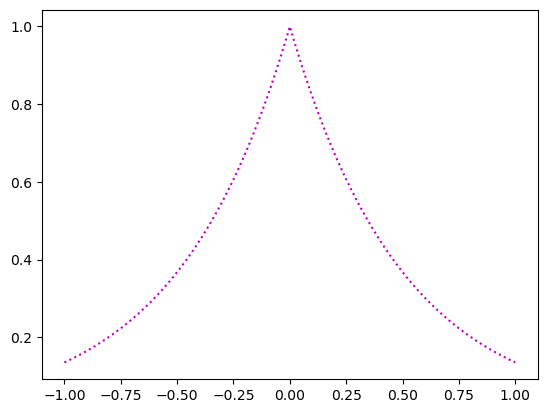

In [9]:
x3 = np.exp(-2*abs(t))
plt.figure() # No se colocó número. El sistema las sigue numerando secuencialmente
plt.plot(t, x3, ':m')
plt.show()

Ahora graficaremos varias señales en una misma figura pero en espacios diferentes. Para eso se divide
primero la figura en una matriz de subgráficos de las dimensiones que uno desee. Imagine que
queremos graficar 4 funciones. Dividimos la figura como una matriz de $2x2$ (2 filas y 2 columnas) y
en cada subgráfico aparecerá una de las señales. Para eso usamos el comando `subplot`, indicando el el número de filas y columnas, y un ìndice para posicionarnos en alguno de los gràficos, luego podemos graficar en esa posición con `plot()`


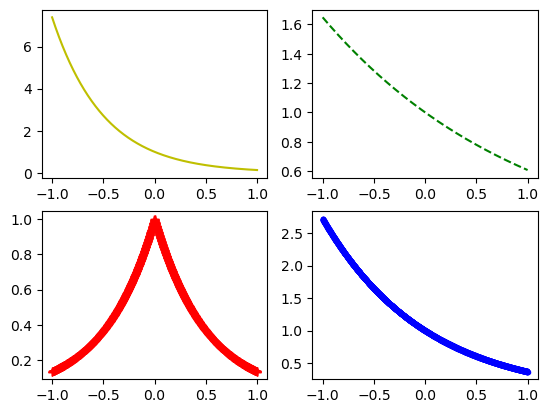

In [10]:
plt.figure()
plt.subplot(2,2,1); plt.plot(t, x1, '-y')
plt.subplot(2,2,2); plt.plot(t, x2, '--g')
plt.subplot(2,2,3); plt.plot(t, x3, '+r')
plt.subplot(2,2,4); plt.plot(t, x, '.b')

Para generar una señal exponencial compleja $y(t)=e^{j2pt}$ escriba en la línea de comandos:

In [11]:
y = np.exp(2j*np.pi*t)

Observe que `j` y `pi` son valores definidos por Python y NumPy. Corresponden a la unidad imaginaria (raíz cuadrada de -1) y al número pi respectivamente. La letra `i` también puede emplearse en lugar de `j`. Para evitar confusiones se recomienda no usar `i` ni `j` como variables.

La señal $y$ es compleja, a diferencia de las señales anteriores.
Observe que todas las funciones y valores que se han definido se encuentran disponibles en la memoria.
Para observar las partes real e imaginaria de $y$, primero cree una nueva figura o espacio de presentación, y dibuje las partes real e imaginaria de $y$:

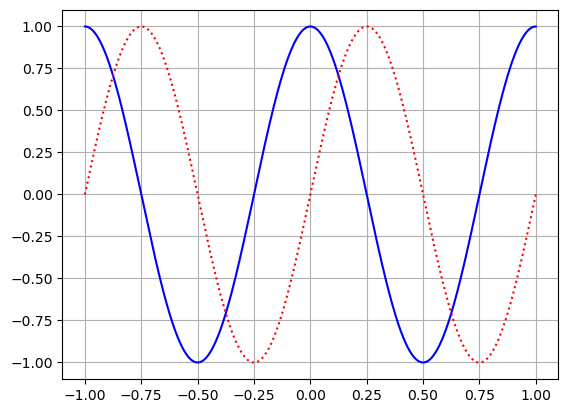

In [12]:
plt.figure()
plt.plot(t, np.real(y), '-b', t, np.imag(y), ':r')
plt.grid()

Las sinusoides reales también pueden ser generadas directamente en Python con NumPy.  Por ejemplo, si se quieren generar sinusoides se puede usar `np.sin` (para Seno) y `np.cos` (para Coseno).

In [13]:
v1 = np.sin(np.pi*t - np.pi/6)
v2 = np.cos(np.pi*t + np.pi/4)

Las graficaremos juntas en la misma figura

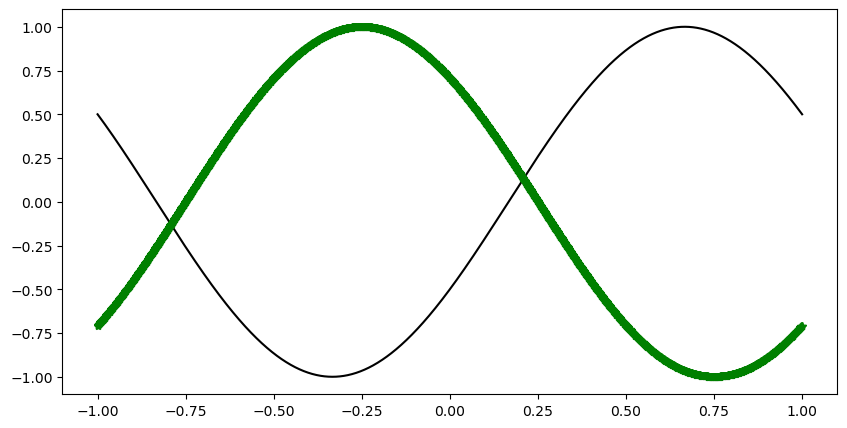

In [14]:
plt.figure(figsize=(10,5))
plt.plot(t,v1,'-k',t,v2,'*g')
plt.show()

Ahora generaremos una **señal cuadrada periódica** y una **diente de sierra**, disponibles en el módulo `signal` de `scipy`, usando las siguiente instrucciones:

In [15]:
cuad = signal.square(2*np.pi*t)
saw = signal.sawtooth(2*np.pi*t)

Las graficaremos usando subplot y no colocaremos información sobre el trazo. En ese caso, las dibujará en el color por defecto, que es azul

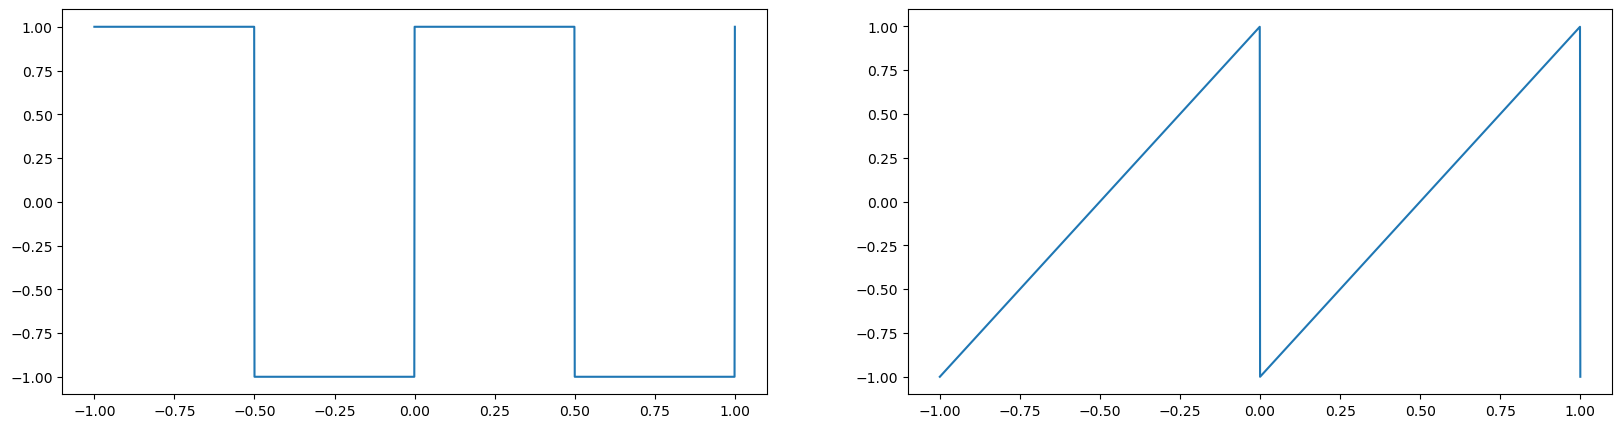

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1); plt.plot(t,cuad)
plt.subplot(1,2,2); plt.plot(t,saw)
plt.show()

Revise el help de las funcion `square` y `sawtooth`.

Ahora generaremos la función `signo(t)`

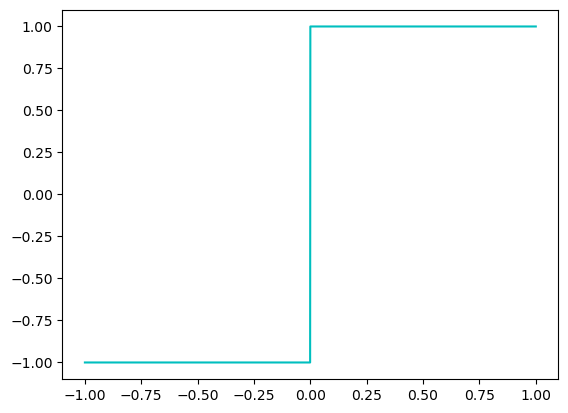

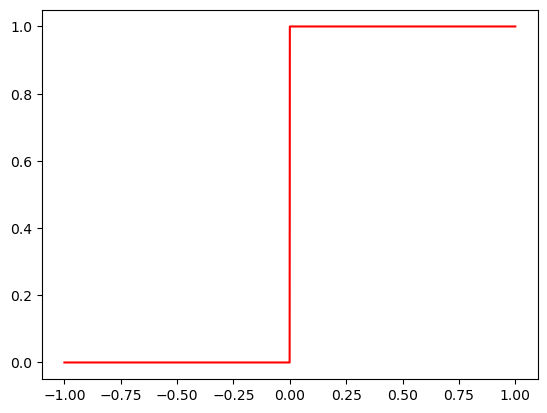

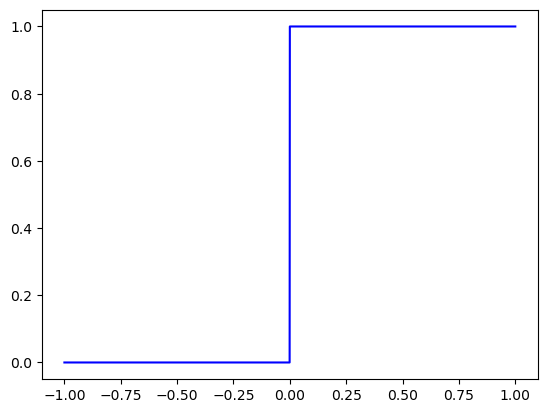

In [17]:
signo = np.sign(t)
plt.figure()
plt.plot(t,signo,"-c")

# construiremos un escalón unitario basado en la función signo
escalonUni = 0.5*(1+signo)
plt.figure()
plt.plot(t,escalonUni,"-r")

# también existe la función heaviside, que es un escalón unitario
escalonNumpy = np.heaviside(t,1)
plt.figure()
plt.plot(t,escalonNumpy,"-b")
plt.show()

★★☆☆☆ - 2.01) Para el signo y el escalón, que son funciones que solo toman valores de 0, y -1, es posible construirlas haciendo uso de las funciones `zeros` y `ones` para crear los valores de 'y', y usando la funcion 'concatenate' de NumPy para unir segmentos. Lea la documentación de esta función y cree un escalón idéntico a los anteriores concatenando un array de unos y un array de ceros. 

In [18]:
# Escalon concatenando unos y ceros

Para cerrar la sección dedicada a señales continuas, generaremos lo que se llama un **barrido en frecuencia** o **chirp**. Es una sinusoide que cambia su frecuencia con el tiempo siguiendo algún tipo de función de variación o método. Esta señal es de especial interes por el hecho de que nos permite excitar de manera controlada un rango específico de frecuencias, y existen técnicas que utilizan este tipo de señales para realizar mediciones de parámetros acústicos en recintos. 

Por ejemplo, para una variación lineal,

$ f(t) = f_0 + (f_1 - f_0) * \frac{t}{t_1} $

donde $f(t)$ es la frecuencia instantánea, $f_0$ es la frecuencia en $t=0$,  $f_1$ es la frecuencia en $t = t_1$
Vamos a generar un nuevo vector de tiempo, y un chirp que vaya de 1 a 100 Hz de manera lineal.

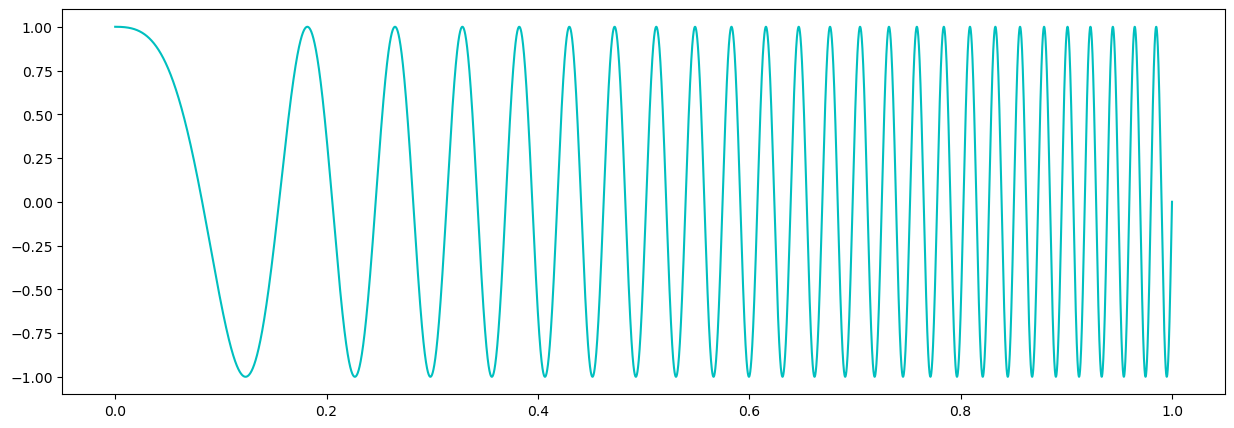

In [19]:
t = np.linspace(0,1,16000)
barrido = signal.chirp(t, f0=1, f1=100, t1=2, method='linear')
plt.figure(figsize=(15,5))
plt.plot(t,barrido,"-c")
plt.show()

★★☆☆☆ - 2.02) Generar y graficar 2 señales continuas periódicas de distinto tipo. Debe generar el vector tiempo correspondiente para un intervalo entre -2s y 2s. Adopte una frecuencia de muestreo adecuada de acuerdo a las señales que vaya a generar.

★★☆☆☆ - 2.03) Generar y graficar 2 señales continuas no periódicas de distinto tipo. Debe generar el vector tiempo correspondiente para un intervalo entre -2s y 2s. Adopte una frecuencia de muestreo adecuada de acuerdo a las señales que vaya a generar.

## SEÑALES DISCRETAS

Antes de continuar borre todos los valores que se encuentran almacenados en memoria: `clear` (en spyder) o kernel->restart (en Jupyter).
Borre también las gráficas.

Es importante aclarar que **cuando se trabaja con una computadora todo es discreto**. En la parte anterior, todas las funciones generadas son discretas, pero las graficamos de forma que parezcan continuas. Incluso, hemos creado un vector de tiempo que toma valores no enteros. 
**Para simular señales discretas en tiempo, también llamadas secuencias, el vector ya no será tiempo, definiremos `n` como la  muestra de esas secuencias**. 
Definimos un arreglo de números enteros entre -10 y 10

In [20]:
n = np.arange(-10,11)

Vamos a comenzar por generar una delta discreta que tendría el valor de 1 en `n=0` y cero en el resto. Lo podemos hacer rellenando el vector de puros ceros y luego en la posición adecuada colocar el 1. Como entre -10 y 10 hay 21 puntos, sabemos que `n=0` está en la posición 10 del vector **delta**.

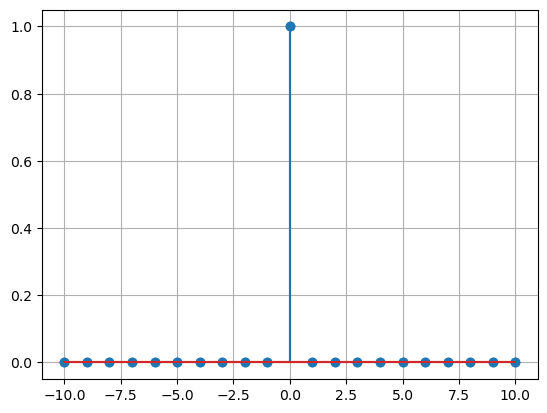

In [21]:
delta = np.zeros(len(n))

delta[10] = 1
plt.figure()
plt.stem(n,delta)
plt.grid()
plt.stem(n,delta)
plt.show()

Para generar un **escalón unitario** se puede hacer el equivalente discreto de integrar la delta, es decir sumaríamos, de manera acumulativa, los valores que tiene el vector delta.

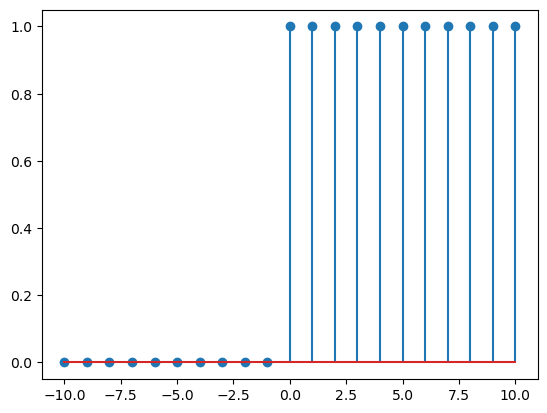

In [22]:
escalon = np.cumsum(delta)
plt.figure()
plt.stem(n,escalon)
plt.show()

Ahora seguiremos conociendo y graficando otras señales discretas o secuencias.
La curva exponencial decreciente `x[n]` se obtiene escribiendo:

In [23]:
x = (0.9)**n

Donde `**` representa la operación de elevar 0.9 a cada uno de los elementos de n. 

<StemContainer object of 3 artists>

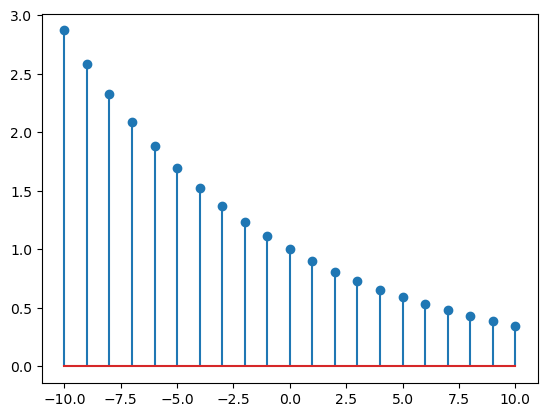

In [24]:
plt.figure()
plt.stem(n,x)

Obtenga una exponencial creciente:

In [25]:
w=(1.11)**n

Grafíquela:

<StemContainer object of 3 artists>

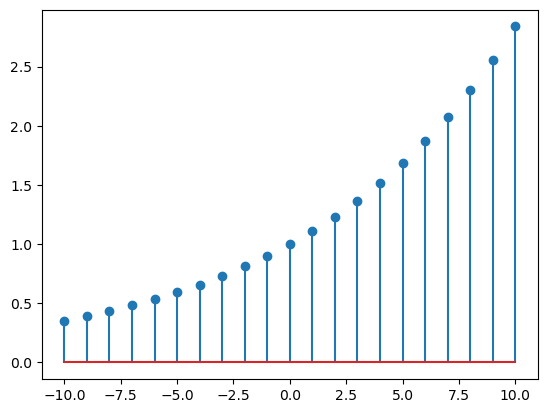

In [26]:
plt.figure()
plt.stem(n,w)

Genere y grafique la señal par que es una exponencial bilateral  $x3[n] = 0.9|n|$.

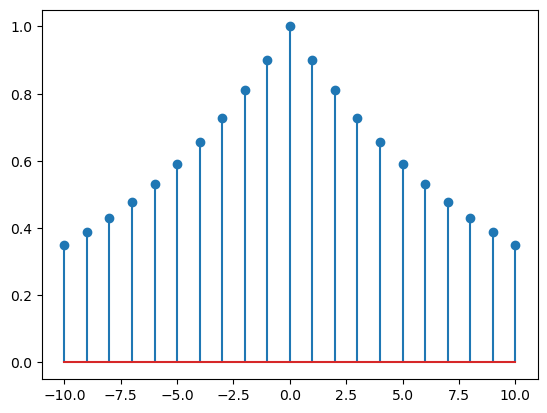

In [27]:
x3 = (0.9)**abs(n);
plt.figure()
plt.stem(n,x3);

Calcule y grafique la senoidal compleja $y[n] = e^{\frac{j\pi n}{5}-\frac{\pi}{3}}$.

c:\Users\abelm\anaconda3\envs\sys\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\abelm\anaconda3\envs\sys\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


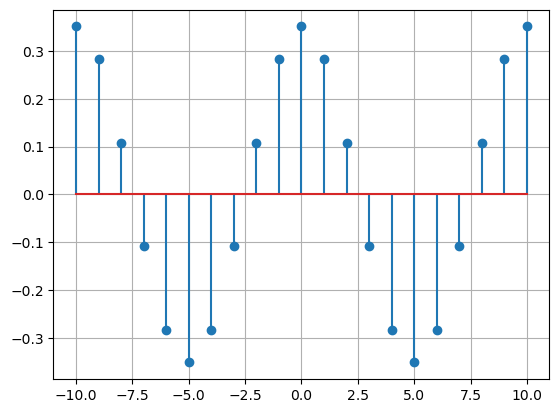

In [28]:
y = np.exp(n*1j/5*np.pi - np.pi/3)
plt.figure()
plt.stem(n,y)
plt.grid() 

Ponga atención a la advertencia que le da el sistema. Indica que el arreglo es complejo y que solo está tomando la parte real
 

★☆☆☆☆ - 2.04) Grafique las partes real e imaginaria de `y[n]`. ¿Cuál es el período de la señal?. Justifique su respuesta gráfica y analíticamente.

Calculemos la función $z[n] = x[n]y[n]$

Recuerde que x es una exponencial discreta decreciente

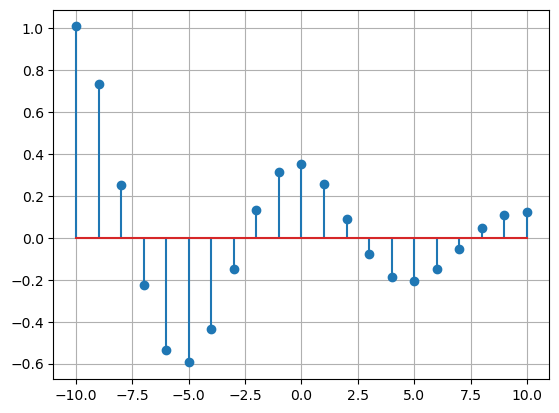

In [29]:
z = x*y
plt.figure()
plt.stem(n,z)
plt.grid()

> Ponga atención a la advertencia que le da el sistema. Indica que el arreglo es complejo y que solo está tomando la parte real
Explique los resultados de las partes real e imaginaria de z[n].

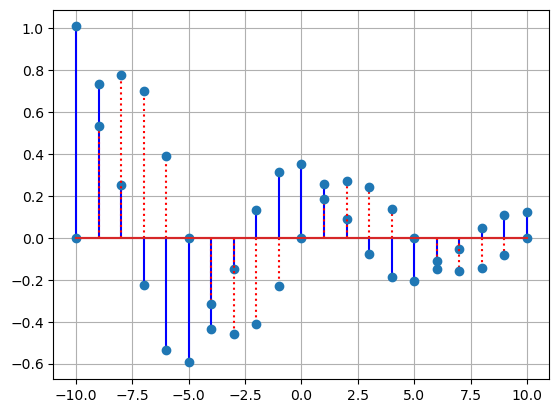

In [30]:
plt.figure()
plt.stem(n,np.real(z),"-b")  # a diferencia de plot, stem no permite colocar dos secuencias
# al no colocar un nuevo plt.figure(), graficará sobre la anterior.
plt.stem(n,np.imag(z),":r")
plt.grid()

Generamos dos senoidales reales similares a las del caso continuo.

In [31]:
v1 = np.cos(np.pi*n/5 - np.pi/3)
v2 = np.sin(np.pi*n/5 - np.pi/4)

Obtenemos las componentes par e impar de cada una, usando las fórmulas de:
* Parte impar de $ x[n]=( x[n]- x[-n])/2 $
* Parte par de $ x[n]=( x[n]+ x[-n])/2$ . 

Investigue cómo funciona la función `np.flip`

In [32]:
v1par = 0.5*(v1 + np.flip(v1))
v1impar = 0.5*(v1 - np.flip(v1))
v2par = 0.5*(v1 + np.flip(v2))
v2impar = 0.5*(v1 - np.flip(v2))

Grafique `v1`, su parte par y su parte impar, `v2` y sus partes par e impar usando `subplot`.
Observe que la parte par siempre es un coseno y la parte impar siempre es un seno.
Sin embargo, para `v1`,  las amplitudes de las componentes Seno y Coseno no son iguales entre sí.

★☆☆☆☆ - 2.05) Desarrolle `v1` usando la siguiente identidad trigonométrica:

$cos (A - B) = cos(A) \cdot cos(B) + sen(A) \cdot sen(B)$

Grafique las señales involucradas.

Verifiquemos que al sumar la parte par y la parte impar de `v1`, se obtiene la secuencia `v1`.
Es decir `v1new = v1par + v1impar = v1`.
Aprovecharemos de estudiar ciertos aspectos de precisión numérica.
Comparamos `v1` y `v1new`

In [33]:
v1new = v1par+v1impar
if (v1 == v1new).all():    # Esto permite comparar todos los elementos de los arreglos
    print("son idénticos")
else:
    print("No son idénticos")

No son idénticos


Cuando se ejecutan esas líneas el resultado indica que **no son idénticos**. Sin embargo, si se grafica la diferencia entre `v1` y `v1new` el resultado es el siguiente. 

<StemContainer object of 3 artists>

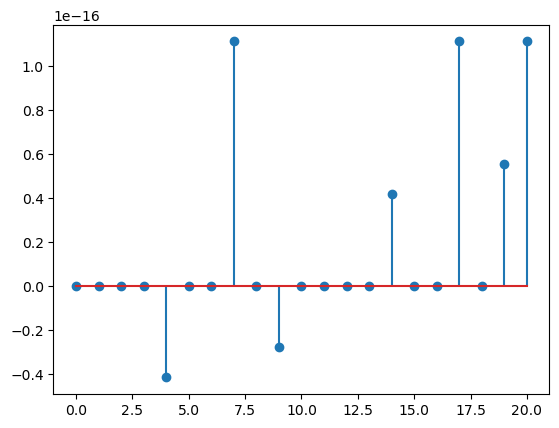

In [34]:
plt.stem(v1-v1new)

Se observa que existe una diferencia en algunas muestras de la señal diferencia. Estas son MUY pequeñas (del orden de 10-16), pero no son nulas. Por eso se concluye que NO son idénticas. Esto tiene que ver con la resolución con la que se representan los números y las operaciones.

Genere ahora un escalón y un signo usando las mismas técnicas que usó para el caso continuo, solo que debe graficarlas con `stem`
Para finalizar con la parte de señales discretas, generaremos otras señales discretas de interés como la **onda cuadrada**, el **diente de sierra**, la **exponencial bilateral** y el **sinc**

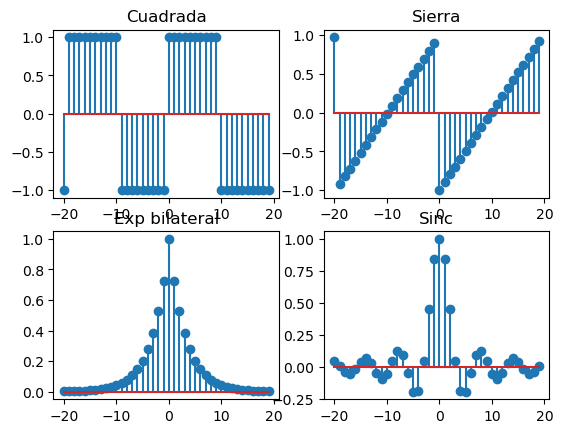

In [35]:
plt.figure()
n=np.arange(-20,20)
plt.subplot(2,2,1); plt.stem(n,signal.square(n/np.pi));plt.title("Cuadrada")
plt.subplot(2,2,2); plt.stem(n,signal.sawtooth(n/np.pi));plt.title("Sierra")
plt.subplot(2,2,3); plt.stem(n,np.exp(-abs(n/np.pi)));plt.title("Exp bilateral")
plt.subplot(2,2,4); plt.stem(n,np.sinc(n/np.pi));plt.title("Sinc")
plt.show()

#### Ejercicios

★☆☆☆☆ - 2.06) Generar y graficar una señal discreta periódica y una no periódica. Para ello, generar un vector n en el intervalo [0, 500]

## CALCULO DE ENERGÍA Y POTENCIA

Comenzaremos con una sinusoide continua


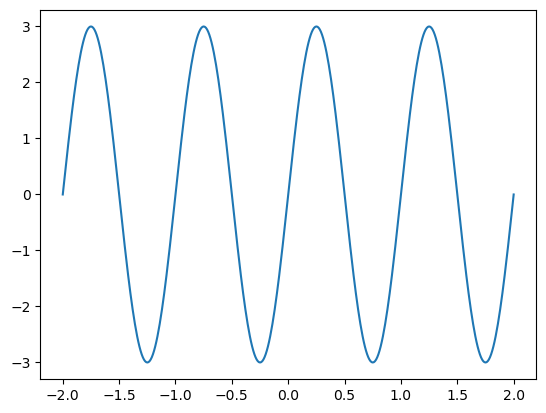

In [36]:
T=0.01
t = np.arange(-2,2+T,T)  # Vector de tiempo  entre -2 y 2 en pasos de T
x=3*np.sin(2*np.pi*1*t); # Creamos una sinusoide de 1 Hz y 3 volts pico
plt.plot(t,x)
plt.show()

T define la separación temporal (en segundos) entre las muestras. Construya la secuencia temporal que va desde -2 a 2, en pasos T y Creamos una sinusoide de 1Hz y 3 volts pico. 
La potencia de esta señal se puede calcular como 

\begin{equation}
P = \lim_{T\to\infty} \frac{1}{T} \int_{-0,5T}^{0,5T} |x(t)|^2 dt = \lim_{T\to\infty} \frac{1}{T} \int_{-0,5T}^{0,5T} x(t) \cdot x^*(t) dt
\end{equation}

Como  es periódica, también se puede evitar el límite y solo integrar en un período. Ese cálculo nos proporciona la potencia promedio normalizada de la señal. Normalizada porque se calcula para una impedancia unitaria. En general veremos que, para una sinusoide de amplitud A, esa potencia resultará igual a $A^{2}/2$. En este caso nos daría  $9/2=4.5$. Lo haremos usando la función `mean`

In [37]:
periodo = np.size(t) //4
x_periodo = x[0:periodo]

pot_x = np.mean(x[0:periodo]*x[0:periodo]) # promedio del cuadrado de x
print('Potencia de x: ', pot_x)

Potencia de x:  4.4999999999999964


El valor que obtendremos será Potx =4.4999 (una aproximación)

Trabajemos ahora con un pulso rectangular y determinaremos su energía

In [38]:
pulso = np.concatenate((np.zeros(150),np.ones(151),np.zeros(100)), axis=0)

La energía se calcula de la siguiente manera, para una señal discreta:
 
\begin{equation}
    E = \sum_{-\infty}^{\infty} |x[n]|^2 
\end{equation}



In [39]:
fs = 1
energia =(1/fs) * np.sum(pulso*pulso)
print('Energía de la señal: ', energia)

Energía de la señal:  151.0


Para establecer las magnitudes respecto al tiempo, la energía se divide por la frecuencia de muestreo que usamos al discretizar (`1/fs`)

Una vez que hemos conocido algunas señales continuas y señales discretas o secuencias, vamos a proceder a manipular algunas de ellas. Primero repasemos lo que es una **función** o **método**. Como vimos anteriormente, una función es una estructura que recibe parámetros de entrada, ofrece unos parámetros de salida y lo logra ejecutando una serie de instrucciones que se aparecen dentro de la función. 
Veamos la función `desplazar`, cuyo código es mostrado a continuación. En primer lugar observamos que la primera línea tiene siempre la siguiente estructura
`def NOMBRE(variables de entrada separadas por coma)`. En este caso el usuario envía a la función la señal `x`, su vector de tiempo `t`, la frecuencia de muestreo y el desplazamiento en segundos)

In [40]:
def desplaza(x, fs, t0):
    N = len(x)
    d = t0*fs
    x2 = np.zeros(N)

    if d > 0:
        for i in range(0,N-int(d)):
            x2[int(i+d)]=x[i]
    else:
        for i in range(0,N+int(d)):
            x2[i]=x[int(i-d)]

    return x2

Esa función  recibe una señal `x`, el valor de `fs`, el vector de tiempo `t`,  `t0` que representa el desplazamiento en segundos que desea aplicar a la señal. Probaremos esta función. Generamos un pulso rectangular y lo desplazaremos.
Definamos una función que genere un pulso rectangular centrado en el intervalo de tiempo `t` suministrado, de amplitud 1 y ancho total=ancho

In [41]:
def pulso_rec(t, fs, ancho):  
    y = np.zeros(t.size)
    inicio = int(0.5*t.size) -int(ancho*fs/2) 
    fin = int(0.5*t.size) + int(ancho*fs/2)
    y[inicio:fin] = 1
    return y

Ahora en el script, luego de definir las dos funciones colocamos el siguiente código.

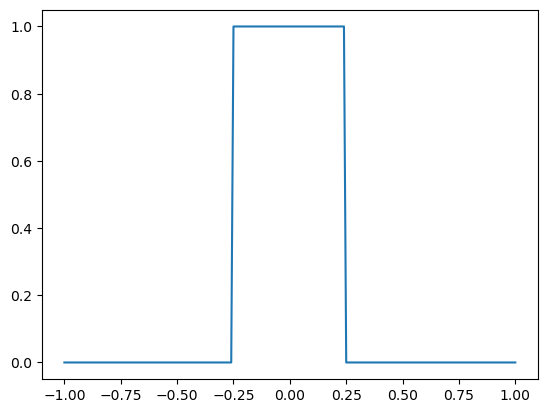

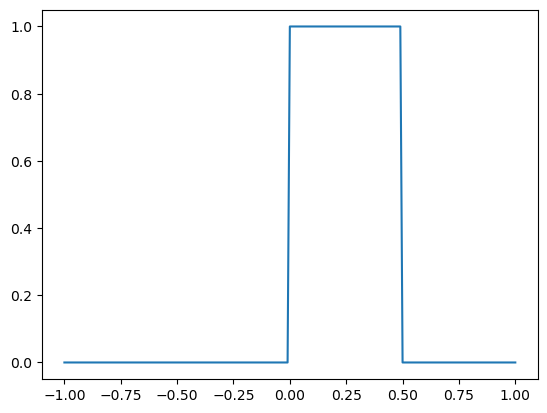

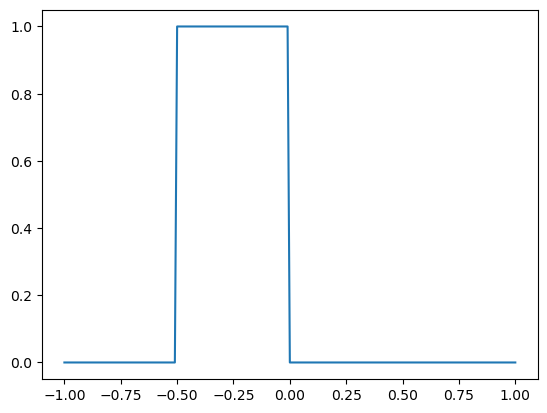

In [42]:
T=0.01
fs = 1/T
t = np.arange(-1,1+T,T)
ancho = 0.5

#Generaremos el pulso rectangular
y= pulso_rec(t, fs, ancho)
plt.figure()
plt.plot(t,y)

# Usaremos la función desplazamiento.
t0=0.25  
ydesp = desplaza(y, fs,t0)  # desplaza el pulso a la derecha
plt.figure()
plt.plot(t,ydesp)

ydesp = desplaza(y, fs,-t0)  # desplaza el pulso a la izquierda
plt.figure()
plt.plot(t,ydesp)

plt.show()

Ahora ofreceremos la posibilidad de girar la señal y luego desplazar. Esa función necesita el paquete numpy

In [43]:
def girodesplaza(x, fs, t0, Giro):

    N = len(x)
    d = t0*fs

    if Giro == 1:
        x = np.flipud(x)

    x2 = np.zeros(N)

    if d > 0:
        for i in range(0,N-int(d)):
            x2[int(i+d)]=x[i]
    else:
        for i in range(0,N+int(d)):
            x2[i]=x[int(i-d)]

    return x2

Esta función presupone que se trabajará con un vector de tiempo (-T a T en pasos de ts)
El parámetro `giro` que toma solo dos valores: 1 si se quiere girar o voltear la función y 0 si no se le quiere girar.
Observe que regresa la variable `x2`

Lo primero que hace la función es determinar el tamaño de `x`, en muestras. Luego determina el valor del desplazamiento en muestras. Lo primero que hace es girar la señal si `giro=1` usando  la función `flipud` que voltea la señal. Una vez pasada la etapa de girar o no, se desplaza la cantidad de que el usuario desee. El desplazamiento `d`  puede ser negativo o positivo, por lo tanto se usa una estructura condicional como es el IF; esto definirá si moverá la señal a la derecha o a la izquierda. Todo esto se hace usando una señal interna que se llama `x2`; se retorna  `x2`.


★☆☆☆☆ - 2.06) Ahora sobre el codigo, luego de definir la función girodesplaza, colocamos lo siguiente (complete los fragmentos donde se indica):

In [44]:
T=0.01
fs = 1/T
t = np.arange(-1,1+T,T)

#Creamos una sinusoide de 1 Hz, completar:
x=np.sin()             
plt.figure()
plt.plot(t,x)
t0 = 0.25  
giro = 1
xgd = girodesplaza (x, fs, t0, giro)   # xgd es x girada y desplazada
plt.figure()
plt.plot(t,xgd)

TypeError: sin() takes from 1 to 2 positional arguments but 0 were given

Ahora ofreceremos la posibilidad de primero desplazar la señal y luego, si se desea, girarla.

In [ ]:
def desplazagiro(x, fs, t0, Giro):

    N = len(x)
    d = t0*fs
    x2 = np.zeros(N)

    if d > 0:
        for i in range(0,N-int(d)):
            x2[int(i+d)]=x[i]
    else:
        for i in range(0,N+int(d)):

            x2[i]=x[int(i-d)]

    if Giro == 1:
        x2 = np.flipud(x2)

    return x2

: 

Lo primero que hace la función es determinar el tamaño de `x`, en muestras. Luego determina el valor del desplazamiento en muestras. El desplazamiento `d`  puede ser negativo o positivo, por lo tanto se usa una estructura condicional como es el IF; esto definirá si moverá la señal a la derecha(t0 positivo) o a la izquierda(t0 negativo). Luego, si `giro =1` se gira la señal usando  la función `flipud`. Finalmente se retorna  el valor de `x2`.

★☆☆☆☆ - 2.07) Usemos la función `despgiro` sobre la misma señal `x` y comparemos los resultados con `girodesp`

In [ ]:
# completar las primeras dos lìneas para hacer funcionar el script
giro = 
xdg = desplazagiro()   # xdg es x desplazada y girada

plt.figure()
plt.plot(t,xgd)
plt.title('Giro y desplazo')

plt.figure()
plt.plot(t,xdg)
plt.title('Desplazo y giro')

: 